In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Atividade 6

In [2]:
## importando a base de dados
base = pd.read_csv("ionosphere-1.data")

In [3]:
## criando o cabeçalho e trocando os valores do coluna 34
base2 = pd.read_csv("ionosphere-1.data", header = None)
base2[34].replace({"g":1}, inplace =True)
base2[34].replace({"b":0}, inplace =True)

In [4]:
##Separando X e y para treino
X = base2[base2.columns[:-1]]
y = base2[base2.columns[-1:]]

# Estabelecendo o limiar de variancia
limiar_de_variancia = 0.35

# Criando o modelo de seleção
selecao = VarianceThreshold(threshold = limiar_de_variancia)

# Selecionando as features
features_selecionadas = selecao.fit_transform(base2)

# Verificando a estrutura dos dados selecionados
print("Formato dos dados Originais:", np.shape(base))
print("Formato dos dados após a seleção de features:", np.shape(features_selecionadas), "\n")
print("Features Selecionadas: \n", features_selecionadas)

Formato dos dados Originais: (350, 35)
Formato dos dados após a seleção de features: (351, 6) 

Features Selecionadas: 
 [[ 0.59755  0.60536  0.84356  0.58212  0.56971  0.36946]
 [ 0.34432 -0.51685  0.05499  0.33109 -0.13151 -0.18056]
 [ 0.85443  0.54591  0.83775  0.75535  0.70887  0.43385]
 ...
 [ 0.92595  0.93954  0.94837  0.93784  0.91406  0.8947 ]
 [ 0.89061  0.90608  0.91381  0.80773  0.88729  0.92155]
 [ 0.80668  0.79262  0.85764  0.8717   0.81722  0.71002]]


In [5]:
## Separando os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e random state = 0.
X_train, X_test, y_train, y_test = train_test_split(features_selecionadas, y, test_size=0.3, random_state=0) 

In [6]:
## Treinando um modelo de classificação
model = LogisticRegression(fit_intercept=True) 
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
## modelo de predição
y_pred = model.predict(X_test) 

In [8]:
## Realizando a classificação e obtendo os seguintes resultados: Acurácia, Precisão, Recall, F1-Score
#print("Acurácia: : ", accuracy_score(y_test, y_pred)*100)
acc = accuracy_score(y_test, y_pred)*100 # calcular a acurácia do modelo
print(f"Acurácia do modelo: {acc:.2f}%")

Acurácia do modelo: 63.21%


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.30      0.40        44
           1       0.64      0.87      0.73        62

    accuracy                           0.63       106
   macro avg       0.63      0.58      0.57       106
weighted avg       0.63      0.63      0.60       106



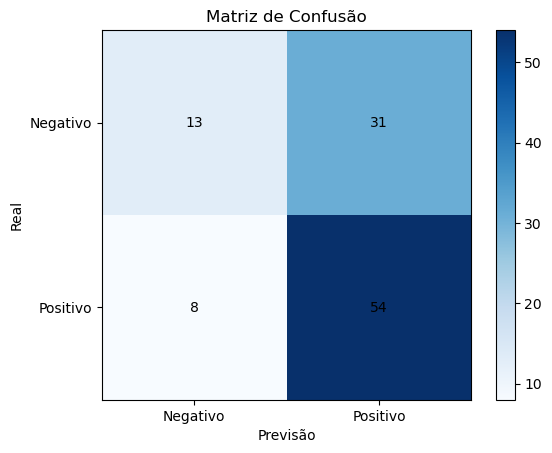

In [10]:
## Plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Real')
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.show()